# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [53]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [54]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

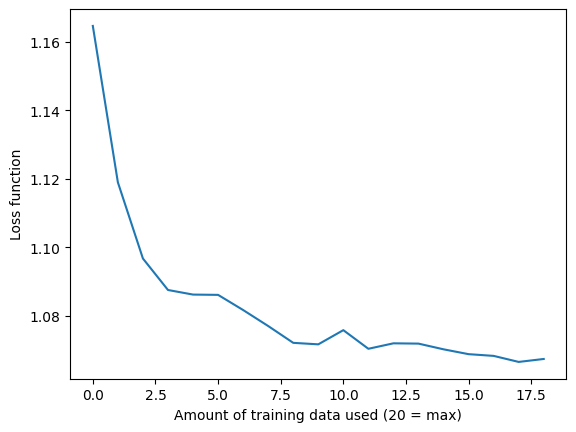

In [55]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [56]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

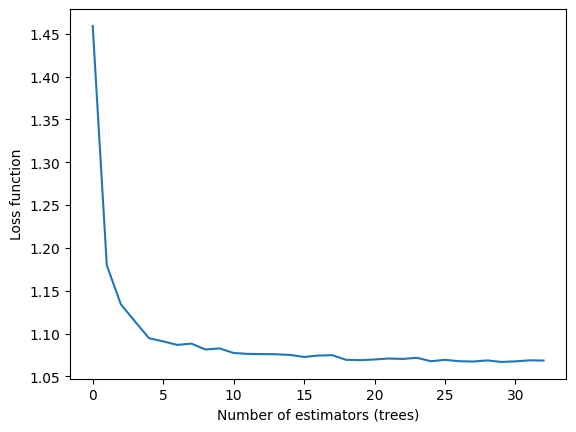

In [57]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

If I had to cut one plot, I’d remove the second one which is showing number of estimators (trees) on the x-axis and keep the one showing amount of training data used. While tuning the number of trees matters, the training data plot tells a more of a story about how much the model improves as it sees more data and it also shows the point of diminishing returns, which is important for deciding whether it's worth collecting more data or not. The training data plot is easier to interpret, more useful for general decisions, and tells a clearer story about model performance. So, I’d keep that one.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [58]:
import pandas as pd

df = pd.read_csv("/workspaces/2025-spring-B2/VehicleInsuranceFraud.csv")
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [59]:
print(df.columns.tolist())


['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year', 'BasePolicy', 'FraudFound']


In [60]:
df = df.dropna()

# Define X and y
X = df.drop(columns=['FraudFound'])  # Corrected column name
y = df['FraudFound'].map({'Yes': 1, 'No': 0})  # Adjust if values are 'Yes'/'No'

# Convert categorical variables
X = pd.get_dummies(X, drop_first=True)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", cv_scores.mean())


Cross-validated accuracy: 0.9414721323085473


In [63]:
print(df['FraudFound'].value_counts())


FraudFound
No     14497
Yes      923
Name: count, dtype: int64


In [64]:
y = df['FraudFound'].map({'Yes': 1, 'No': 0})


In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 11)
}

search = RandomizedSearchCV(model, param_distributions=param_dist, 
                            scoring='roc_auc', n_iter=10, cv=5, random_state=42)
search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best score (ROC AUC):", search.best_score_)


Best parameters: {'max_depth': 20, 'min_samples_split': 7, 'n_estimators': 179}
Best score (ROC AUC): 0.840840737201043


I used RandomizedSearchCV with 5-fold cross-validation to tune a Random Forest Classifier on my auto insurance fraud dataset. Because the target variable is imbalanced, I selected ROC AUC as my scoring metric, which evaluates how well the model separates fraudulent from non-fraudulent claims regardless of class imbalance.

Best Parameters Identified:

n_estimators: 179
max_depth: 20
min_samples_split: 7
Best Cross-Validated ROC AUC Score: 0.841

This score indicates strong model performance in distinguishing between classes. RandomizedSearchCV allowed me to efficiently explore the parameter space without testing every possible combination. Using roc_auc instead of accuracy helped avoid misleading results from class imbalance.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

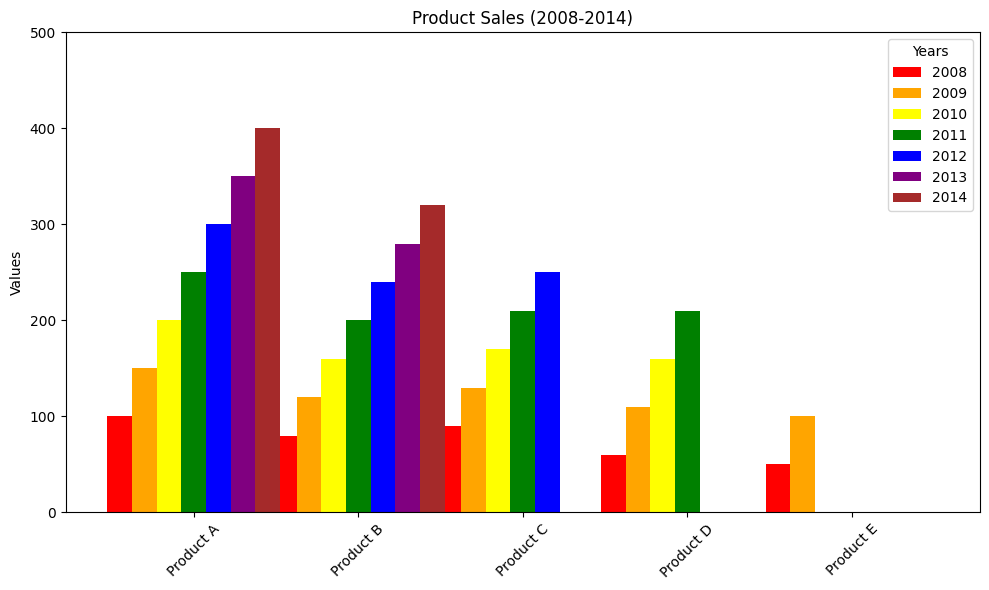

In [66]:
import matplotlib.pyplot as plt
import numpy as np

products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
data = {
    'Product A': [100, 150, 200, 250, 300, 350, 400],
    'Product B': [80, 120, 160, 200, 240, 280, 320],
    'Product C': [90, 130, 170, 210, 250, 0, 0],
    'Product D': [60, 110, 160, 210, 0, 0, 0],
    'Product E': [50, 100, 0, 0, 0, 0, 0]
}

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown']

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
x_pos = np.arange(len(products))

for i, year in enumerate(years):
    values = [data[product][i] for product in products]
    ax.bar(x_pos + i * bar_width, values, width=bar_width, color=colors[i], label=year)

ax.set_ylabel('Values')
ax.set_title('Product Sales (2008-2014)')
ax.set_xticks(x_pos + bar_width * 3)  # Position x-ticks in the center of bars
ax.set_xticklabels(products)

ax.set_yticks([0, 100, 200, 300, 400, 500])

ax.legend(title='Years')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

